<a href="https://colab.research.google.com/github/Arunsatvik/cmpe255-spring22/blob/main/Lab3/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
## importing all the packages 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import io

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

In [27]:
## importing dataset 

df = pd.read_csv("/content/fetal_health.csv")

In [28]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [29]:
## shape of the dataset
df.shape

(2126, 22)

In [30]:
## checking for null values 

df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

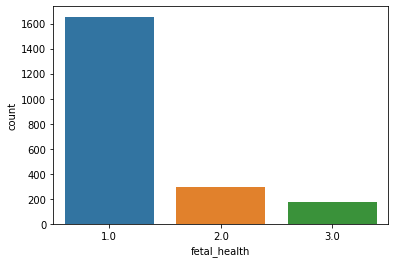

In [31]:
## distribution of target varaibles 
sns.countplot(x = 'fetal_health' ,data = df)

In [32]:
###OverSampling -- balancing target values 

over = RandomOverSampler()

X, Y = df.iloc[:,:-1], df['fetal_health']

X,Y = over.fit_resample(X,Y)

In [33]:
## reducing the dimensions to 2 

pca = PCA(n_components=2)

X = pd.DataFrame(pca.fit_transform(X))


In [34]:
Y.value_counts()

2.0    1655
1.0    1655
3.0    1655
Name: fetal_health, dtype: int64

In [35]:
## code for plotting the decision boundary 

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

## training model with C = 0.1


In [36]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


svc1 = SVC(C = 0.1, kernel='linear')

svc1.fit(x_train, y_train)

y_pred_train1 = svc1.predict(x_train)
print('accuracy:', accuracy_score(y_train,y_pred_train1))
print('\nconfusion_matrix:' , confusion_matrix(y_train,y_pred_train1))
print('\nclassification_report:\n' , classification_report(y_train,y_pred_train1))

y_pred_test1 = svc1.predict(x_test)
print('\naccuracy:', accuracy_score(y_test,y_pred_test1))
print('\nconfusion_matrix:\n' , confusion_matrix(y_test,y_pred_test1))
print('\nclassification_report:\n' , classification_report(y_test,y_pred_test1))

accuracy: 0.6193353474320241

confusion_matrix: [[686 511 109]
 [341 935  60]
 [135 356 839]]

classification_report:
               precision    recall  f1-score   support

         1.0       0.59      0.53      0.56      1306
         2.0       0.52      0.70      0.60      1336
         3.0       0.83      0.63      0.72      1330

    accuracy                           0.62      3972
   macro avg       0.65      0.62      0.62      3972
weighted avg       0.65      0.62      0.62      3972


accuracy: 0.62134944612286

confusion_matrix:
 [[187 139  23]
 [ 76 234   9]
 [ 35  94 196]]

classification_report:
               precision    recall  f1-score   support

         1.0       0.63      0.54      0.58       349
         2.0       0.50      0.73      0.60       319
         3.0       0.86      0.60      0.71       325

    accuracy                           0.62       993
   macro avg       0.66      0.62      0.63       993
weighted avg       0.66      0.62      0.63       993



No handles with labels found to put in legend.


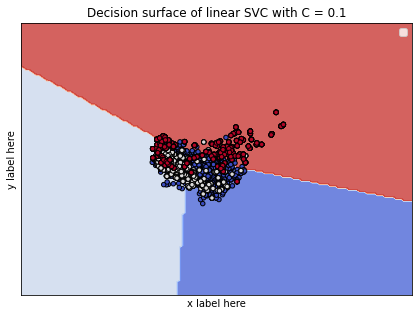

In [37]:
X1 = scaler.fit_transform(X)

fig, ax = plt.subplots(figsize=(7,5))
# title for the plots
title = ('Decision surface of linear SVC with C = 0.1')
# Set-up grid for plotting.
X0, X1 = X1[:, 0], X1[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svc1, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

## training model with C = 1

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


svc2 = SVC(C = 1, kernel = 'linear')

svc2.fit(x_train, y_train)

y_pred_train2 = svc2.predict(x_train)
print('accuracy:', accuracy_score(y_train,y_pred_train2))
print('confusion_matrix:\n' , confusion_matrix(y_train,y_pred_train1))

y_pred_test2 = svc2.predict(x_test)
print('\naccuracy:', accuracy_score(y_test,y_pred_test2))
print('confusion_matrix:\n' , confusion_matrix(y_test,y_pred_test1))

accuracy: 0.6633937562940584
confusion_matrix:
 [[404 615 335]
 [389 606 316]
 [369 581 357]]

accuracy: 0.6807653575025177
confusion_matrix:
 [[ 87 152  62]
 [108 154  82]
 [103 161  84]]


No handles with labels found to put in legend.


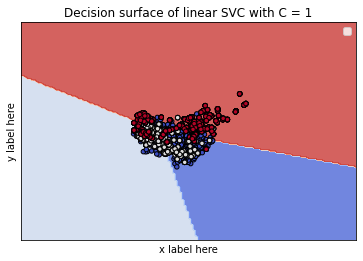

In [39]:
X1 = scaler.fit_transform(X)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC with C = 1')
# Set-up grid for plotting.
X0, X1 = X1[:, 0], X1[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svc2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

## training model with C = 10

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


svc3 = SVC(C = 10, kernel='linear')

svc3.fit(x_train, y_train)

y_pred_train3 = svc3.predict(x_train)
print('accuracy:', accuracy_score(y_train,y_pred_train3))
print('confusion_matrix:\n' , confusion_matrix(y_train,y_pred_train1))

y_pred_test3 = svc3.predict(x_test)
print('\naccuracy:', accuracy_score(y_test,y_pred_test3))
print('confusion_matrix:\n' , confusion_matrix(y_test,y_pred_test1))

accuracy: 0.6686807653575025
confusion_matrix:
 [[411 586 332]
 [377 613 332]
 [374 603 344]]

accuracy: 0.648539778449144
confusion_matrix:
 [[100 157  69]
 [ 98 162  73]
 [100 148  86]]


No handles with labels found to put in legend.


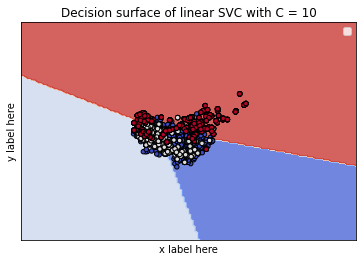

In [41]:
X1 = scaler.fit_transform(X)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC with C = 10')
# Set-up grid for plotting.
X0, X1 = X1[:, 0], X1[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svc3, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()